In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\Jeet\Desktop\Instacart Basket analysis2'

In [3]:
# Import data frame 'df_merge.pkl' into Jupyter dataframe

df_merge = pd.read_pickle(os.path.join(path, 'Prepared data', 'df_merge2.pkl'))

In [4]:
#Checking the frequency
df_merge['frequency_flag'].value_counts(dropna = False)

Frequent customer        21560324
Regular customer          7209005
Non-frequent customer     3636707
NaN                             5
Name: frequency_flag, dtype: int64

In [5]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,NaN,-60,1.0,0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
1,2398795,1,2,3,7,15.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
2,473747,1,3,3,12,21.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
3,2254736,1,4,4,7,29.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family
4,431534,1,5,4,15,28.0,-60,1.0,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower_Middle_Class,beverages,family


In [6]:
df_merge.shape

(32406041, 35)

In [7]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_order', 'loyalty_flag', 'average_price_spent',
       'spending_flag', 'frequent_customers', 'frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'n_dependants', 'Marital Status',
       'income', 'region', 'exclusion flag', 'age_flag', 'income_flag',
       'department', 'family_flag'],
      dtype='object')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [8]:
# create days column with name for customer-profile-level

df_merge.loc[df_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'saturday'

In [9]:
df_merge.loc[df_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'sunday'

In [10]:
df_merge.loc[df_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'monday'

In [11]:
df_merge.loc[df_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'tuesday'

In [12]:
df_merge.loc[df_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'wednesday'

In [13]:
df_merge.loc[df_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'thursday'

In [14]:
df_merge.loc[df_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'friday'

<AxesSubplot:>

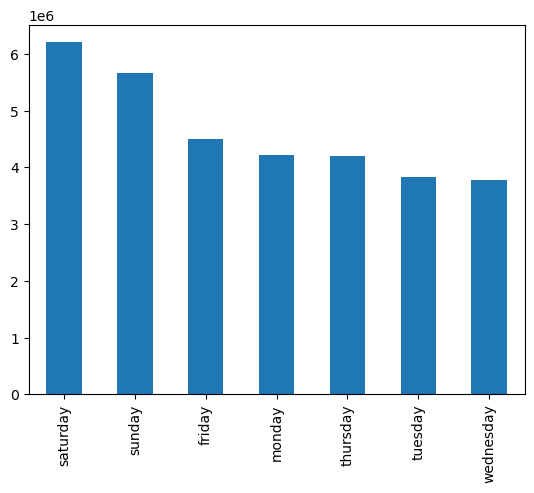

In [15]:
# Creating chart to see which days of weeks are most busiest 

df_merge['day_of_week'].value_counts().plot.bar()

Acc to chart, the busiest day is Saturday and after that sunday.

USAGE FREQUENCY

In [16]:
# Age Profile Usage Frequency Aggregation
df_merge.groupby('age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_flag                                     
Boomers I                11.062500  0.0  30.0
Boomers II               11.132812  0.0  30.0
Gen X                    11.109375  0.0  30.0
Gen Z                    11.109375  0.0  30.0
Millennials              11.109375  0.0  30.0
Post War                 11.085938  0.0  30.0

In [17]:
# Income Profile Usage Frequency Aggregation

df_merge.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
income_flag                                         
Low Class                       11.773438  0.0  30.0
Lower_Middle_Class              11.507812  0.0  30.0
Middle_Class                    11.046875  0.0  30.0
Upper_Middle_Class              11.023438  0.0  30.0
Wealthy Class                   10.554688  0.0  30.0

In [18]:
# Family Status Profile Usage Frequency Aggregration

df_merge.groupby('family_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
family_flag                                       
family                        11.125000  0.0  30.0
family with baby               9.960938  0.0  30.0
single adult                  11.078125  0.0  30.0

In [19]:
# Gender Status Profile Usage Frequency Aggregration

df_merge.groupby('Gender').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              11.085938  0.0  30.0
Male                11.125000  0.0  30.0

In [20]:
# Region Status Profile Usage Frequency Aggregration

df_merge.groupby('region').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                11.179688  0.0  30.0
Northeast              11.078125  0.0  30.0
Southeast              11.132812  0.0  30.0
Southwest              10.929688  0.0  30.0
West                   11.070312  0.0  30.0

EXPENDITURE

In [21]:
# Age Profile Expenditure Frequency Aggregation

df_merge.groupby('age_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Boomers I    7.792969  1.0  25.0
Boomers II   7.796875  1.0  25.0
Gen X        7.789062  1.0  25.0
Gen Z        7.785156  1.0  25.0
Millennials  7.789062  1.0  25.0
Post War     7.796875  1.0  25.0

In [22]:
# Income Profile Expenditure Frequency Aggregation

df_merge.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                        mean  min   max
income_flag                            
Low Class           6.500000  1.0  25.0
Lower_Middle_Class  6.871094  1.0  25.0
Middle_Class        7.921875  1.0  25.0
Upper_Middle_Class  7.957031  1.0  25.0
Wealthy Class       7.753906  1.0  25.0

In [23]:
# Family Status Profile Expenditure Frequency Aggregration

df_merge.groupby('family_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
family_flag                          
family            7.792969  1.0  25.0
family with baby  7.652344  1.0  15.0
single adult      7.789062  1.0  25.0

In [24]:
# Gender Status Profile Expenditure Frequency Aggregration

df_merge.groupby('Gender').agg({'prices':['mean', 'min', 'max']})

prices           
            mean  min   max
Gender                     
Female  7.789062  1.0  25.0
Male    7.792969  1.0  25.0

In [25]:
# Region Status Profile Usage Frequency Aggregration

df_merge.groupby('region').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792969  1.0  25.0
Northeast  7.781250  1.0  25.0
Southeast  7.796875  1.0  25.0
Southwest  7.789062  1.0  25.0
West       7.789062  1.0  25.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

REGIONS

In [17]:
age_with_regions = pd.crosstab(df_merge['age_flag'], df_merge['region'], dropna = False)

In [18]:
age_with_regions

region,Midwest,Northeast,Southeast,Southwest,West
age_flag,,,,,
Boomers I,1048973,810567,1328181,345051,1011085
Boomers II,1161459,896065,1465813,390156,1063133
Gen X,1955427,1446105,2351274,662287,1768306
Gen Z,1050475,798853,1367620,371648,969575
Millennials,1904681,1408820,2386546,650417,1743863
Post War,476570,362529,600674,181137,428751


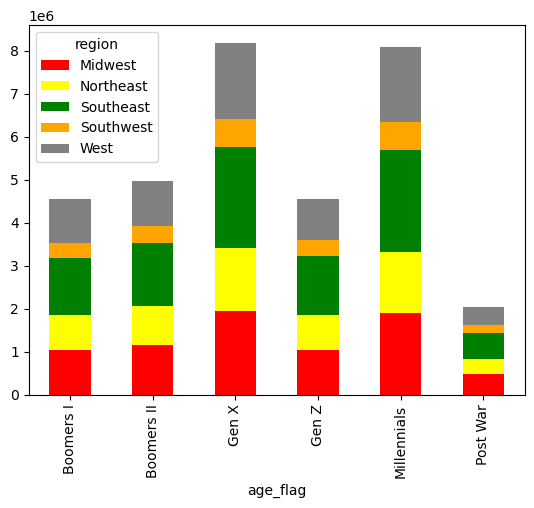

In [19]:
bar_age_with_regions= age_with_regions.plot(kind = 'bar', stacked = True, color =['red','yellow','green','Orange','grey'])

In [20]:
income_flag_regions= pd.crosstab(df_merge['income_flag'], df_merge['region'], dropna = False)

In [21]:
income_flag_regions

region,Midwest,Northeast,Southeast,Southwest,West
income_flag,,,,,
Low Class,125534,85790,161211,46101,105144
Lower_Middle_Class,874681,677944,1109365,301062,801315
Middle_Class,3529634,2669912,4501748,1210384,3335254
Upper_Middle_Class,3048176,2279519,3715326,1039563,2729390
Wealthy Class,19560,9774,12458,3586,13610


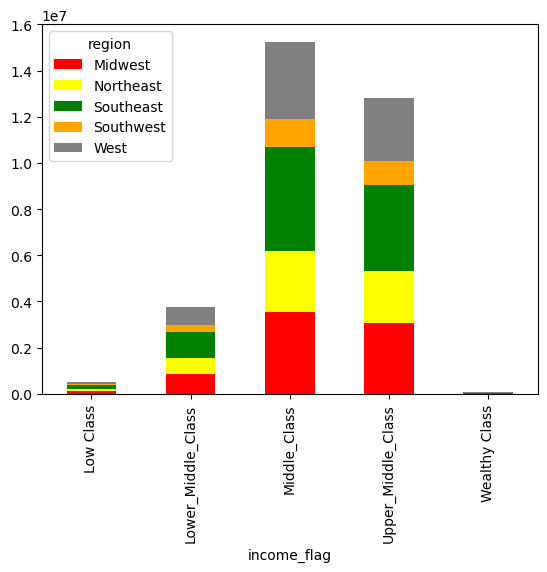

In [22]:
bar_income_flag_regions= income_flag_regions.plot(kind = 'bar', stacked = True, color =['red','yellow','green','Orange','grey'])

In [23]:
Family_flag_regions= pd.crosstab(df_merge['family_flag'], df_merge['region'], dropna = False)

In [24]:
Family_flag_regions

region,Midwest,Northeast,Southeast,Southwest,West
family_flag,,,,,
family,5618715,4247945,7046156,1880893,5197165
family with baby,73594,56621,93046,26181,67866
single adult,1905276,1418373,2360906,693622,1719682


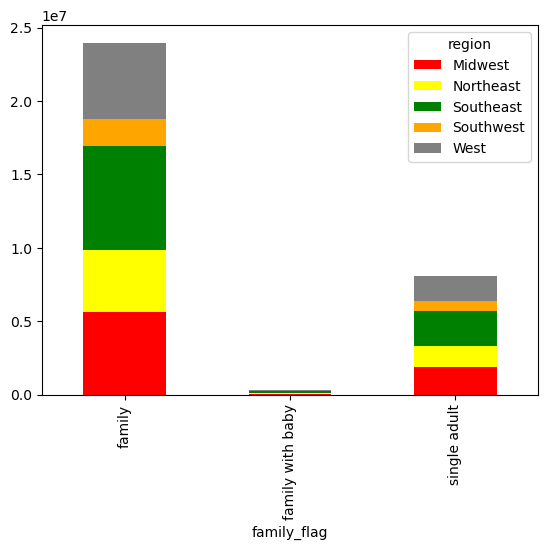

In [25]:
bar_Family_flag_regions= Family_flag_regions.plot(kind = 'bar', stacked = True, color =['red','yellow','green','Orange','grey'])

In [26]:
gender_region= pd.crosstab(df_merge['Gender'], df_merge['region'], dropna = False)

In [27]:
gender_region

region,Midwest,Northeast,Southeast,Southwest,West
Gender,,,,,
Female,3806789,2764049,4735527,1285631,3498462
Male,3790796,2958890,4764581,1315065,3486251


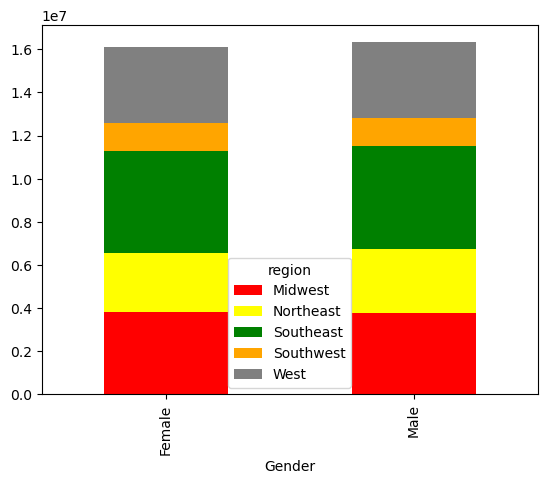

In [28]:
bar_gender_region= gender_region.plot(kind = 'bar', stacked = True, color =['red','yellow','green','Orange','grey'])

DEPARTMENTS

In [30]:
pd.crosstab(df_merge['age_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_flag,,,,,,,,,,,,,,,,,,,,,
Boomers I,21385,58915,164275,382950,98265,4755,147675,762572,147439,120847,...,104746,37171,99534,9535,4841,262652,61992,13532,1324441,402860
Boomers II,22921,63990,179709,414329,106853,5235,165013,822752,162919,133162,...,113160,41142,109521,10675,5742,290675,69326,15053,1458115,440301
Gen X,38925,109160,297051,682407,178789,8670,269141,1358286,264031,219337,...,186452,67758,178647,17355,9224,474679,114411,24643,2387537,731110
Gen Z,23050,60810,165291,375524,100746,4964,150872,762535,147714,123061,...,102915,38403,99758,10133,5271,263707,62879,14775,1326518,405955
Millennials,38385,105065,292275,663076,175080,8656,267674,1355634,263283,215440,...,184227,67710,175349,17154,8999,465563,111047,23390,2378835,723638
Post War,9077,25862,73827,169837,44378,2293,67683,336968,65863,54780,...,47166,17069,46118,4293,2214,118093,27974,6323,603845,183686


In [29]:
Income_flag_department=pd.crosstab(df_merge['income_flag'], df_merge['department'], dropna = False)

In [30]:
Income_flag_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Low Class,2878,3683,16419,61760,14327,764,12055,75725,17200,9850,...,13785,3533,4183,1033,690,25049,7302,1194,124709,93485
Lower_Middle_Class,19737,35918,122305,406017,99231,4914,95896,571357,119351,78705,...,95978,25289,45453,7759,4212,192453,54029,10257,954103,575049
Middle_Class,66731,211287,556619,1200438,320244,16382,516651,2572762,496668,421020,...,335047,131519,353891,33173,16951,892255,209466,45563,4573227,1222115
Upper_Middle_Class,62526,172451,474464,1014290,268976,12509,441255,2168955,416444,355261,...,290961,108388,303995,27119,14331,761921,175934,40222,3815296,991567
Wealthy Class,1871,463,2621,5618,1333,4,2201,9948,1586,1791,...,2895,524,1405,61,107,3691,898,480,11956,5334


In [33]:
pd.crosstab(df_merge['family_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_flag,,,,,,,,,,,,,,,,,,,,,
family,114600,0,878023,2013681,529225,26295,803220,4049385,786104,651365,...,557893,201540,534843,52057,27116,1408612,335601,73133,7103846,2166752
family with baby,0,317308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
single adult,39143,106494,294405,674442,174886,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112028,24583,2375445,720798


# 9. exporting data

In [34]:
#Exporting Chart
bar_age_with_regions.figure.savefig(os.path.join(path,'Visualisation', 'bar_age_with_regions.png'), bbox_inches='tight')

In [35]:
bar_income_flag_regions.figure.savefig(os.path.join(path,'Visualisation', 'bar_income_flag_regions.png'), bbox_inches='tight')

In [36]:
bar_Family_flag_regions.figure.savefig(os.path.join(path,'Visualisation', 'bar_Family_flag_regions.png'), bbox_inches='tight')

In [37]:
bar_gender_region.figure.savefig(os.path.join(path,'Visualisation', 'bar_gender_region.png'), bbox_inches='tight')

In [ ]:
# Exporting data 

df_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merge.pkl'))